# Project: Wrangling and Analyze Data

In [551]:
# Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [552]:
import requests
import os

## Data Gathering

###  Data 1 - Reading the Twitter archive data (twitter_archive_enhanced.csv)

In [553]:
df1 = pd.read_csv("twitter-archive-enhanced.csv")
df1.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


### Data 2 - Using the Requests library to download the tweet image prediction (image_predictions.tsv)

In [554]:
# Using the request library to get the file from the url
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
response

<Response [200]>

In [555]:
# Saving the file to the current directory i am working on
with open(os.path.join('C:\\Users\\DELL\\Desktop\\project 2 udacity', url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [556]:
#Reading the tsv file downloaded
df2 = pd.read_csv('image-predictions.tsv',sep = '\t')
df2.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


### Data 3 - Using the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Querying Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df1.tweet_id.values
len(tweet_ids)

# Querying Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Saving each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [557]:
import json
tweets_list = []
with open('tweet-json.txt', 'r') as file:
    for line in file:
        data = json.loads(line)
        tweets_list.append(data)
df3 = pd.DataFrame(tweets_list, columns=['id', 'retweet_count', 'favorite_count'])

In [558]:
df3.head(3)

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461


## Assessing the Data

### Visually Assessing the Data

In [559]:
df1.sample(15)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
215,851224888060895234,NaN,NaN,2017-04-10 00:06:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Snoop. His number one passion is sticking...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/851224888...,13,10,Snoop,None,None,None,None
236,847251039262605312,NaN,NaN,2017-03-30 00:56:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Furzey. He's doing an elevated sandy z...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/847251039...,12,10,Furzey,None,None,None,None
2025,671882082306625538,NaN,NaN,2015-12-02 02:42:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Batdog. He's sleeping now but when he ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671882082...,11,10,Batdog,None,None,None,None
263,842535590457499648,NaN,NaN,2017-03-17 00:38:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Winnie. She lost her body saving a chi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/842535590...,13,10,Winnie,None,None,None,None
1871,675147105808306176,NaN,NaN,2015-12-11 02:56:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're presenting a group project and the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675147105...,10,10,None,None,None,None,None
634,793614319594401792,NaN,NaN,2016-11-02 00:42:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: When she says you're a good boy...,7.916723e+17,4.196984e+09,2016-10-27 16:06:04 +0000,https://twitter.com/dog_rates/status/791672322...,13,10,None,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
1892,674754018082705410,6.747522e+17,4.196984e+09,2015-12-10 00:54:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Just received another perfect photo of dogs an...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674754018...,12,10,None,None,None,None,None
1244,711743778164514816,NaN,NaN,2016-03-21 02:38:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Roosevelt. He's calculating the best case...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/711743778...,11,10,Roosevelt,None,None,None,None
484,814638523311648768,NaN,NaN,2016-12-30 01:05:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Olivia. She's a passionate advocate of...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/814638523...,12,10,Olivia,None,None,None,None


In [560]:
df2.sample(15)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1542,791312159183634433,https://pbs.twimg.com/media/CvtONV4WAAAQ3Rn.jpg,4,miniature_pinscher,0.892925,True,toy_terrier,0.095524,True,Doberman,0.003544,True
1738,822244816520155136,https://pbs.twimg.com/media/C2kzTGxWEAEOpPL.jpg,1,Samoyed,0.585441,True,Pomeranian,0.193654,True,Arctic_fox,0.071648,False
1566,793962221541933056,https://pbs.twimg.com/media/CwS4aqZXUAAe3IO.jpg,1,Labrador_retriever,0.861651,True,golden_retriever,0.044462,True,Staffordshire_bullterrier,0.016497,True
1539,790946055508652032,https://pbs.twimg.com/media/CvoBPWRWgAA4het.jpg,1,dishwasher,0.700466,False,golden_retriever,0.245773,True,chow,0.039012,True
812,692530551048294401,https://pbs.twimg.com/media/CZxc3G7WEAAM4Mv.jpg,1,Siberian_husky,0.486428,True,Eskimo_dog,0.448518,True,white_wolf,0.041506,False
2001,876484053909872640,https://pbs.twimg.com/media/DCnll_dUQAAkBdG.jpg,1,golden_retriever,0.874566,True,Irish_terrier,0.037354,True,chow,0.016724,True
435,674394782723014656,https://pbs.twimg.com/media/CVvueeeWwAUcQLR.jpg,1,toilet_tissue,0.134983,False,mosquito_net,0.133247,False,Lakeland_terrier,0.109099,True
1035,711743778164514816,https://pbs.twimg.com/media/CeCfMPDW0AAAEUj.jpg,1,Lakeland_terrier,0.459515,True,miniature_poodle,0.219661,True,standard_poodle,0.130189,True
1912,853760880890318849,https://pbs.twimg.com/media/C9kq_bbVwAAuRZd.jpg,1,miniature_pinscher,0.292519,True,Chihuahua,0.120946,True,Rottweiler,0.119490,True
10,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,1,golden_retriever,0.775930,True,Tibetan_mastiff,0.093718,True,Labrador_retriever,0.072427,True


In [561]:
df3.sample(15)

,id,retweet_count,favorite_count
2113,670428280563085312,694,1484
71,878604707211726852,7582,30931
1405,699079609774645248,745,2677
2301,666996132027977728,102,258
1621,684902183876321280,605,2053
325,833826103416520705,3904,16728
189,855857698524602368,2313,12498
532,807621403335917568,4288,16236
1949,673686845050527744,479,1544
2138,670003130994700288,100,352


## Assessing the Data Programmatically

### DF1

In [562]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [563]:
df1.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

### Checking to see if some of the Ratings extracted are correct

In [564]:
# Checking the denominators
df1["rating_denominator"].value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [565]:
#Taking five random samples
df1["rating_denominator"].value_counts().sample(5)

40     1
7      1
110    1
90     1
20     2
Name: rating_denominator, dtype: int64

In [566]:
def confirm_ratingD(x):
    """
    This function checks the index and the 
    text of the tweet to confirm ratings.
    
    Return: None
    """  
    d = df1["rating_denominator"]
    for i in d:
        print(df1.loc[df1.rating_denominator == x, 'text'])
        return

In [567]:
# Calling the function to check some information
confirm_ratingD(x = 7)
# Checking another random sample
confirm_ratingD(x = 70)
# confirming rating for denominator 2
confirm_ratingD(x = 2)
# confirming rating for denominator 11
confirm_ratingD(x = 11)


516    Meet Sam. She smiles 24/7 &amp; secretly aspir...
Name: text, dtype: object
433    The floofs have been released I repeat the flo...
Name: text, dtype: object
2335    This is an Albanian 3 1/2 legged  Episcopalian...
Name: text, dtype: object
784     RT @dog_rates: After so many requests, this is...
1068    After so many requests, this is Bretagne. She ...
1662    This is Darrel. He just robbed a 7/11 and is i...
Name: text, dtype: object


In [568]:
# Printing the texts in full
print(df1['text'][516]) 
print(df1['text'][433]) 
print(df1['text'][2335]) 
print(df1['text'][784]) 
print(df1['text'][1068])
print(df1['text'][1662]) 

Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv
RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5


#### Some of the denominators contains ratings that are not correct as shown above

##### Checking for the numerators

In [569]:
df1["rating_numerator"].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [570]:
#Taking five random samples
df1["rating_numerator"].value_counts().sample(5)

50     1
0      2
17     1
420    2
45     1
Name: rating_numerator, dtype: int64

In [571]:
def confirm_ratingN(x):
    """
    This function checks the index and the 
    text of the tweet to confirm ratings.
    
    Return: None
    """  
    n = df1["rating_numerator"]
    for i in n:
        print(df1.loc[df1.rating_numerator == x, 'text'])
        return

In [572]:
# checking some of the ratings to confirm their numerators
confirm_ratingN(x = 1)
confirm_ratingN(x = 26)
confirm_ratingN(x=50)


605     RT @dog_rates: Not familiar with this breed. N...
1446    After reading the comments I may have overesti...
1869    What kind of person sends in a picture without...
1940    The millennials have spoken and we've decided ...
2038    After 22 minutes of careful deliberation this ...
2091    Flamboyant pup here. Probably poisonous. Won't...
2261    Never seen dog like this. Breathes heavy. Tilt...
2335    This is an Albanian 3 1/2 legged  Episcopalian...
2338    Not familiar with this breed. No tail (weird)....
Name: text, dtype: object
1712    Here we have uncovered an entire battalion of ...
Name: text, dtype: object
1202    This is Bluebert. He just saw that both #Final...
Name: text, dtype: object


In [573]:
# Printing the texts in full to confirm the ratings
print(df1['text'][2335]) 
print(df1['text'][1712]) 
print(df1['text'][1202]) 

This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv
Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD
This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq


#### Some of the numerators contains ratings that are not correct as shown above

In [574]:
# Checking the names
df1['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [575]:
# Checking for Duplicates
df1.tweet_id.duplicated().value_counts(), df1.shape

(False    2356
 Name: tweet_id, dtype: int64,
 (2356, 17))

## OBSERVATIONS
* Timestamp column is a string type and should be in datetime form
* Dog stages should be in one column
* The source of the tweet is ambiguous and not easy to understand
* Abnormal ratings in numerator and denominator rating values
* Some of the tweets are retweets and only original tweets with pictures are required
* Some Columns will be dropped as they have alot of missing values

### Checking df2 (image predictions)

In [576]:
df2.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2019,880465832366813184,https://pbs.twimg.com/media/DDgK-J4XUAIEV9W.jpg,1,golden_retriever,0.913255,True,Labrador_retriever,0.026329,True,cocker_spaniel,0.009371,True
1705,817423860136083457,https://pbs.twimg.com/ext_tw_video_thumb/81742...,1,ice_bear,0.336200,False,Samoyed,0.201358,True,Eskimo_dog,0.186789,True
454,674764817387900928,https://pbs.twimg.com/media/CV0_BSuWIAIvE9k.jpg,2,Samoyed,0.634695,True,Arctic_fox,0.309853,False,kuvasz,0.019641,True
974,706901761596989440,https://pbs.twimg.com/media/Cc9rZlBWwAA56Ra.jpg,1,wild_boar,0.859499,False,hog,0.128981,False,warthog,0.011318,False
450,674739953134403584,https://pbs.twimg.com/media/CV0oaHFW4AA9Coi.jpg,1,Dandie_Dinmont,0.175915,True,black-footed_ferret,0.096534,False,toy_poodle,0.064145,True
627,680836378243002368,https://pbs.twimg.com/media/CXLREjOW8AElfk6.jpg,3,Pembroke,0.427781,True,Shetland_sheepdog,0.160669,True,Pomeranian,0.111250,True
319,671768281401958400,https://pbs.twimg.com/media/CVKZsHtWwAA6gPj.jpg,2,Chihuahua,0.500373,True,French_bulldog,0.112796,True,Italian_greyhound,0.062893,True
1832,836677758902222849,https://pbs.twimg.com/media/C5x57-TWUAEawQh.jpg,2,leopard,0.797410,False,jaguar,0.095487,False,snow_leopard,0.079694,False
1938,860524505164394496,https://pbs.twimg.com/media/C_EyeKuXkAAdxY-.jpg,1,Bedlington_terrier,0.286558,True,toy_poodle,0.235193,True,Lakeland_terrier,0.087951,True
1264,749064354620928000,https://pbs.twimg.com/media/CmU2DVWWgAArvp3.jpg,2,pug,0.985222,True,Brabancon_griffon,0.003314,True,Pekinese,0.002989,True


In [577]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [578]:
# Checking common dogs for Prediction 1
df2.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

In [579]:
# Checking common dogs for prediction 2
df2.p2.value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
medicine_chest          1
quail                   1
horse_cart              1
waffle_iron             1
bagel                   1
Name: p2, Length: 405, dtype: int64

In [580]:
#checking common dogs for prediction 3
df2.p3.value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
ox                     1
assault_rifle          1
axolotl                1
pot                    1
banana                 1
Name: p3, Length: 408, dtype: int64

In [581]:
df2.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [582]:
# Checking for Duplicates
df2.jpg_url.duplicated().sum(), df2.tweet_id.duplicated().sum()

(66, 0)

### OBSERVATIONS
* Some dog names are not actually dogs and some need to be capitalized
* Duplicated jpg urls 
* Prediction columns can be merged into one standard prediction Rating

### Twitter API dataframe

In [583]:
df3.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [584]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [585]:
df3.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


# Cleaning the Data

#### Making Copies of the DataFrames using `.copy()`

In [586]:
df1C = df1.copy()
df2C = df2.copy()
df3C = df3.copy()

## OBSERVATIONS AND THEIR CATEGORIES

### QUALITY ISSUES
* Merging data prediction column to have one single column for dog_breed and prediction confidence ratings
* Only original tweets that have pictures should be retained, retweets will be removed
* Timestamp column is string, it should be converted to datetime object
* Source information provided is difficult to read and should be cleaned
* Some of the dog_breeds are not actually dogs and they should be capitalized
* Some columns will be dropped as they have alot of missing values
* Incorrect Entries in rating numerators and denominators
* Correct all the wrong data types in the dataset, including changing source and dog_stages into category data type for future analysis
* Remove missing values in expanded_urls column by using `.dropna`


### TIDINESS ISSUES

* The dog stages Column for df1 twitter_archive_enhanced.csv can be placed into one column
* Information about the tweets are spread across three different datasets. Therefore, these three datasets will be merged as one.

### Data Cleaning Process

* Define
* Code
* Test

### Quality Issue 1

Define : Merging data prediction column to have one single column for dog_breed and prediction confidence ratings

Code

In [587]:
df2C.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [588]:
# Create an empty list for dog_breed and confidence_rating
dog_breed = []
confidence_rating = []

# creating a function to check the confidence rating is it's True

def breed_confidence(df2C):
    """
    This function checks if the dog is true based on the predictions: p1 is the most accurate
    followed by p2  and then p3. The function also appends the confidence rating for each known dog.
    
    """
    if df2C.p1_dog == True:
        dog_breed.append(df2C.p1)
        confidence_rating.append(df2C.p1_conf)
    elif df2C.p2_dog == True:
        dog_breed.append(df2C.p2)
        confidence_rating.append(df2C.p2_conf)
    elif df2C.p3_dog == True:
        dog_breed.append(df2C.p3)
        confidence_rating.append(df2C.p3_conf)
    else:
        dog_breed.append("unknown")
        confidence_rating.append(0)

In [589]:
# Applying the Function
df2C.apply(breed_confidence, axis = 1)

0       None
1       None
2       None
3       None
4       None
        ... 
2070    None
2071    None
2072    None
2073    None
2074    None
Length: 2075, dtype: object

In [590]:
# Add the breed and confidence_level column to image_prediction column
df2C['dog_breed'] = dog_breed
df2C['confidence_rating'] = confidence_rating

In [591]:
# dropping columns that we do not need again
df2C = df2C.drop([ 'p1_conf',
                    'p2_conf',
                    'p3_conf'],axis=1)

Test

In [592]:
df2C.head()

,tweet_id,jpg_url,img_num,p1,p1_dog,p2,p2_dog,p3,p3_dog,dog_breed,confidence_rating
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,True,collie,True,Shetland_sheepdog,True,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,True,miniature_pinscher,True,Rhodesian_ridgeback,True,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,True,malinois,True,bloodhound,True,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,True,redbone,True,miniature_pinscher,True,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,True,Rottweiler,True,Doberman,True,miniature_pinscher,0.560311


### Quality Issue 2

Define : Only original tweets that have pictures should be retained, retweets will be removed

Code

In [593]:
# Removing rows that have non-empty retweeted_status_id and retweeted_status_user_id

# Removing retweets
df1C = df1C[df1C.retweeted_status_id.isnull()]

# Removing replies
df1C = df1C[df1C.in_reply_to_status_id.isnull()]

Test

In [594]:
df1C.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

### Quality Issue 3

Define : Timestamp column is string, it should be converted to datetime object

Code

In [595]:
df1C.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [596]:
# Converting the timestamp column in the df1C frame to a datetime object
df1C["timestamp"] = pd.to_datetime(df1C["timestamp"])

In [597]:
type(df1C['timestamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [598]:
#Year the tweet was sent
df1C["tweet_year"] = df1C["timestamp"].dt.year
# Month of tweet
df1C["timestamp"].dt.month
months = {1:'Jan', 2:'Feb', 3:'Mar',4:'Apr', 5:'May', 6:'June', 7:'July', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
df1C['month_of_tweet'] = df1C["timestamp"].dt.month.apply(lambda x : months[x])
# days tweets were sent
df1C['timestamp'].dt.day_of_week
days = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
df1C['day_of_tweet'] = df1C['timestamp'].dt.day_of_week.apply(lambda x : days[x])
#hour of the tweet sent in a 24 hour system
df1C["hour_of_tweet"] = df1C["timestamp"].dt.hour

Test

In [599]:
df1C.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,rating_denominator,name,doggo,floofer,pupper,puppo,tweet_year,month_of_tweet,day_of_tweet,hour_of_tweet
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,10,Phineas,None,None,None,None,2017,Aug,Tuesday,16
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,10,Tilly,None,None,None,None,2017,Aug,Tuesday,0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,10,Archie,None,None,None,None,2017,July,Monday,0


In [600]:
df1C.tweet_year.value_counts()

2016    1054
2015     668
2017     375
Name: tweet_year, dtype: int64

### Quality Issue 4

Define : Source information provided is difficult to read and should be cleaned

Code

In [601]:
df1['source'].head(3)

0    <a href="http://twitter.com/download/iphone" r...
1    <a href="http://twitter.com/download/iphone" r...
2    <a href="http://twitter.com/download/iphone" r...
Name: source, dtype: object

In [602]:
df1['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [603]:
df1['source'] = df1['source'].replace ({'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>':'Twitter for i-phone',
                                       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>':'Vine - make a scene',
                                       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>':'Twitter Web Client',
                                       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>':'Tweet Deck'})

Test

In [604]:
# Add cleaned source column to the copied dataFrame
df1C['tweet_source'] = df1['source']

In [605]:
df1C['tweet_source'].value_counts()

Twitter for i-phone    1964
Vine - make a scene      91
Twitter Web Client       31
Tweet Deck               11
Name: tweet_source, dtype: int64

### Quality Issue 5

Define : Some of the dog_breeds are not actually dogs and they should be capitalized

Code

In [606]:
df2C.head()

,tweet_id,jpg_url,img_num,p1,p1_dog,p2,p2_dog,p3,p3_dog,dog_breed,confidence_rating
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,True,collie,True,Shetland_sheepdog,True,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,True,miniature_pinscher,True,Rhodesian_ridgeback,True,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,True,malinois,True,bloodhound,True,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,True,redbone,True,miniature_pinscher,True,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,True,Rottweiler,True,Doberman,True,miniature_pinscher,0.560311


In [607]:
# Filtering posts that are not dogs
df2C.query('p1_dog == False and p2_dog == False and p3_dog == False').tweet_id

#Creating a list where all the id's that are not dogs will be dropped from
drop_list = df2C.query('p1_dog == False and p2_dog == False and p3_dog == False').tweet_id


In [608]:
df3C.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [609]:
df3C.rename(columns = {'id' : 'tweet_id'}, inplace = True)

In [610]:
# I am now going to drop all the columns with the ID's in the drop list in all dataframes
df1C = df1C[~df1C.tweet_id.isin(drop_list)]
df2C = df2C[~df2C.tweet_id.isin(drop_list)]
df3C = df3C[~df3C.tweet_id.isin(drop_list)]

In [611]:
# dropping columns that we do not need again
df2C = df2C.drop(['p1','p1_dog',
                             'p2','p2_dog',
                             'p3','p3_dog'],axis=1)

In [612]:
# Capitalizing Dog Breed Names
df2C['dog_breed'] = df2C['dog_breed'].str.capitalize()

Test

In [613]:
df2C.head()

,tweet_id,jpg_url,img_num,dog_breed,confidence_rating
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_pinscher,0.560311


In [614]:
# Checking the new shape of the data
df1C.shape, df2C.shape, df3C.shape

((1792, 22), (1751, 5), (2031, 3))

## Quality Issue 6

Define: Some columns will be dropped as they have alot of missing values

Code

In [615]:
df1C.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,name,doggo,floofer,pupper,puppo,tweet_year,month_of_tweet,day_of_tweet,hour_of_tweet,tweet_source
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,Tilly,None,None,None,None,2017,Aug,Tuesday,0,Twitter for i-phone
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,Archie,None,None,None,None,2017,July,Monday,0,Twitter for i-phone
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,Darla,None,None,None,None,2017,July,Sunday,15,Twitter for i-phone
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,Franklin,None,None,None,None,2017,July,Saturday,16,Twitter for i-phone
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,...,None,None,None,None,None,2017,July,Saturday,0,Twitter for i-phone


In [616]:
df1C.drop(['in_reply_to_status_id', 
                  'in_reply_to_user_id',
                  'source',
                  'retweeted_status_id',
                  'retweeted_status_user_id',
                  'retweeted_status_timestamp'], axis = 1, inplace=True)

Test

In [617]:
df1C.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1792 entries, 1 to 2355
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1792 non-null   int64              
 1   timestamp           1792 non-null   datetime64[ns, UTC]
 2   text                1792 non-null   object             
 3   expanded_urls       1789 non-null   object             
 4   rating_numerator    1792 non-null   int64              
 5   rating_denominator  1792 non-null   int64              
 6   name                1792 non-null   object             
 7   doggo               1792 non-null   object             
 8   floofer             1792 non-null   object             
 9   pupper              1792 non-null   object             
 10  puppo               1792 non-null   object             
 11  tweet_year          1792 non-null   int64              
 12  month_of_tweet      1792 non-null 

In [618]:
df1C.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,tweet_year,month_of_tweet,day_of_tweet,hour_of_tweet,tweet_source
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,2017,Aug,Tuesday,0,Twitter for i-phone
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,2017,July,Monday,0,Twitter for i-phone
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,2017,July,Sunday,15,Twitter for i-phone
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,2017,July,Saturday,16,Twitter for i-phone
5,891087950875897856,2017-07-29 00:08:17+00:00,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None,2017,July,Saturday,0,Twitter for i-phone


## Quality Issue 7

Define: Incorrect Entries in rating numerators and denominators

Code

In [619]:
df1C.rating_numerator.value_counts()

12     461
10     377
11     373
13     255
9      135
8       71
7       32
14      26
6       16
5       15
4        7
3        5
2        2
0        1
45       1
88       1
144      1
26       1
121      1
44       1
60       1
50       1
80       1
99       1
84       1
165      1
27       1
75       1
24       1
1        1
Name: rating_numerator, dtype: int64

In [620]:
# rating_numerator 75, 26, 27, 0
df1C.query('rating_numerator == 75 or rating_numerator == 26 or rating_numerator == 27 or rating_numerator == 0')

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,tweet_year,month_of_tweet,day_of_tweet,hour_of_tweet,tweet_source
315,835152434251116546,2017-02-24 15:40:31+00:00,When you're so blinded by your systematic plag...,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None,2017,Feb,Friday,15,Twitter for i-phone
695,786709082849828864,2016-10-13 23:23:56+00:00,"This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None,2016,Oct,Thursday,23,Twitter for i-phone
763,778027034220126208,2016-09-20 00:24:34+00:00,This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None,2016,Sept,Tuesday,0,Twitter for i-phone
1712,680494726643068929,2015-12-25 21:06:00+00:00,Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,26,10,None,None,None,None,None,2015,Dec,Friday,21,Twitter for i-phone


In [621]:
print(df1C['text'][315]) 
print(df1C['text'][695])
print(df1C['text'][763]) 
print(df1C['text'][1712]) 

When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag
This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS
This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq
Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD


In [622]:
# Correcting the ratings
# tweet_id: 786709082849828864, rating _numberator should be 9.75 according to the text
df1C.loc[df1C.tweet_id == 786709082849828864, 'rating_numerator'] = 9.75
# tweet_id: 680494726643068929, rating _numberator should be 11.26 according to the text
df1C.loc[df1C.tweet_id == 680494726643068929, 'rating_numerator'] = 11.26
# tweet_id: 778027034220126208, rating _numberator should be 11.27 according to the text
df1C.loc[df1C.tweet_id == 778027034220126208, 'rating_numerator'] = 11.27

In [623]:
# rating_denominator 75, 26, 27, 0
df1C.query('rating_denominator == 7 or rating_denominator == 11 or rating_denominator == 2 or rating_denominator == 70')

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,tweet_year,month_of_tweet,day_of_tweet,hour_of_tweet,tweet_source
433,820690176645140481,2017-01-15 17:52:40+00:00,The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,84.0,70,None,None,None,None,None,2017,Jan,Sunday,17,Twitter for i-phone
516,810984652412424192,2016-12-19 23:06:23+00:00,Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24.0,7,Sam,None,None,None,None,2016,Dec,Monday,23,Twitter for i-phone
1068,740373189193256964,2016-06-08 02:41:38+00:00,"After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,9.0,11,None,None,None,None,None,2016,June,Wednesday,2,Twitter for i-phone
1662,682962037429899265,2016-01-01 16:30:13+00:00,This is Darrel. He just robbed a 7/11 and is i...,https://twitter.com/dog_rates/status/682962037...,7.0,11,Darrel,None,None,None,None,2016,Jan,Friday,16,Twitter for i-phone
2335,666287406224695296,2015-11-16 16:11:11+00:00,This is an Albanian 3 1/2 legged Episcopalian...,https://twitter.com/dog_rates/status/666287406...,1.0,2,an,None,None,None,None,2015,Nov,Monday,16,Twitter for i-phone


In [624]:
print(df1C['text'][433]) 
print(df1C['text'][516])
print(df1C['text'][1068]) 
print(df1C['text'][1662]) 
print(df1C['text'][2335]) 

The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5
This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv


In [625]:
# Correcting the ratings
# tweet_id: 810984652412424192, rating _numberator should be NAN according to the text
df1C.loc[df1C.tweet_id == 810984652412424192, 'rating_denominator'] = 'NAN'
# tweet_id: 740373189193256964, rating _numberator should be 10 according to the text
df1C.loc[df1C.tweet_id == 740373189193256964, 'rating_denominator'] = 10
# tweet_id: 682962037429899265, rating _numberator should be 10 according to the text
df1C.loc[df1C.tweet_id == 682962037429899265, 'rating_denominator'] = 10
# tweet_id: 666287406224695296, rating _numberator should be 10 according to the text
df1C.loc[df1C.tweet_id == 666287406224695296, 'rating_denominator'] = 10

Test

In [626]:
# rating_denominator 75, 26, 27, 0
df1C.query('rating_denominator == 7 or rating_denominator == 11 or rating_denominator == 2 or rating_denominator == 70')

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,tweet_year,month_of_tweet,day_of_tweet,hour_of_tweet,tweet_source
433,820690176645140481,2017-01-15 17:52:40+00:00,The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,84.0,70,None,None,None,None,None,2017,Jan,Sunday,17,Twitter for i-phone


In [627]:
# rating_numerator 75, 26, 27, 0
df1C.query('rating_numerator == 75 or rating_numerator == 26 or rating_numerator == 27 or rating_numerator == 0')

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,tweet_year,month_of_tweet,day_of_tweet,hour_of_tweet,tweet_source
315,835152434251116546,2017-02-24 15:40:31+00:00,When you're so blinded by your systematic plag...,https://twitter.com/dog_rates/status/835152434...,0.0,10,None,None,None,None,None,2017,Feb,Friday,15,Twitter for i-phone


### Quality Issue 8

Define: Remove missing values in expanded_urls column by using `.dropna`

Code

In [628]:
df1C.dropna(subset=['expanded_urls'], inplace=True)

In [629]:
# replacing none with np.nan for easy working with null values
df1C.replace('None', np.NaN, inplace=True)

Test

In [630]:
df1C.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1789 entries, 1 to 2355
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1789 non-null   int64              
 1   timestamp           1789 non-null   datetime64[ns, UTC]
 2   text                1789 non-null   object             
 3   expanded_urls       1789 non-null   object             
 4   rating_numerator    1789 non-null   float64            
 5   rating_denominator  1789 non-null   object             
 6   name                1313 non-null   object             
 7   doggo               73 non-null     object             
 8   floofer             10 non-null     object             
 9   pupper              193 non-null    object             
 10  puppo               23 non-null     object             
 11  tweet_year          1789 non-null   int64              
 12  month_of_tweet      1789 non-null 

In [ ]:
df1C.expanded_urls.isnull().sum()

### Tidiness Issue 1

Define: Merging the different dog stages column into one

Code

In [636]:
df1C.shape

(1789, 16)

In [637]:
df1C[['tweet_id','doggo','floofer','pupper','puppo']].sample(5)

,tweet_id,doggo,floofer,pupper,puppo
1086,738166403467907072,NaN,NaN,NaN,NaN
525,809084759137812480,NaN,NaN,NaN,NaN
882,760290219849637889,NaN,NaN,NaN,NaN
1234,712717840512598017,NaN,NaN,NaN,NaN
1298,707741517457260545,NaN,NaN,NaN,NaN


In [638]:
# using the pd.melt() method to convert the columns into rows
df_dog_stage= pd.melt(df1C, id_vars='tweet_id', value_vars=['doggo','floofer','pupper','puppo'], value_name='dog_stage')
df_dog_stage.head()

,tweet_id,variable,dog_stage
0,892177421306343426,doggo,NaN
1,891815181378084864,doggo,NaN
2,891689557279858688,doggo,NaN
3,891327558926688256,doggo,NaN
4,891087950875897856,doggo,NaN


In [639]:
# dropping the variable column
df_dog_stage.drop('variable', axis=1, inplace=True)

In [640]:
# Dropping Duplicates
df_dog_stage.drop_duplicates(inplace=True)

In [641]:
# combine stages for tweets with more than one dog stage
has_dog_stage = df_dog_stage[df_dog_stage.dog_stage.notna()]
combined_stages = has_dog_stage.groupby('tweet_id').transform(lambda x: ', '.join(x))

In [642]:
# replacing these combined stages in the dog_stage_df
df_dog_stage.loc[combined_stages.index, 'dog_stage'] = combined_stages.values

In [643]:
# dropping duplicates
df_dog_stage.sort_values(by='dog_stage', inplace=True)
df_dog_stage.drop_duplicates(subset='tweet_id', inplace=True)

In [644]:
df1C.drop(["doggo", "floofer", "pupper", "puppo"], axis=1, inplace=True)

In [645]:
# merge the dog_stage dataframe and the copied dataframe
df1C = pd.merge(df1C, df_dog_stage, on=['tweet_id'])

Test

In [646]:
df1C.head(2)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,tweet_year,month_of_tweet,day_of_tweet,hour_of_tweet,tweet_source,dog_stage
0,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,2017,Aug,Tuesday,0,Twitter for i-phone,NaN
1,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,2017,July,Monday,0,Twitter for i-phone,NaN


### Tidiness Issue 2

Define: Information about the tweets are spread across three different datasets. Therefore, these three datasets will be merged as one.

Code

In [647]:
# Merge all data Frame based on ID
twitter_project_clean = pd.merge(df1C, df2C,
                            on = ['tweet_id'], how = 'left')

In [648]:
# Combining the three dataframes together
twitter_project_clean = pd.merge(twitter_project_clean, df3C,
                            on = ['tweet_id'], how = 'left')

In [649]:
# Dropping rows that do not have image url
twitter_project_clean = (twitter_project_clean[twitter_project_clean.jpg_url.notnull()])

In [650]:
twitter_project_clean.jpg_url.isnull().sum()

0

Test

In [651]:
twitter_project_clean.head(3)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,tweet_year,month_of_tweet,day_of_tweet,hour_of_tweet,tweet_source,dog_stage,jpg_url,img_num,dog_breed,confidence_rating,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,2017,Aug,Tuesday,0,Twitter for i-phone,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,6514,33819
1,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,2017,July,Monday,0,Twitter for i-phone,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,4328,25461
2,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,2017,July,Sunday,15,Twitter for i-phone,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,Labrador_retriever,0.168086,8964,42908


## Storing Data
Saving gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [652]:
# Saving combined cleaned dataframe to master datframe
twitter_project_clean.to_csv('twitter_archive_master.csv')

In [653]:
# load data to a dataframe
df = pd.read_csv('twitter_archive_master.csv')
df.drop("Unnamed: 0", axis=1, inplace=True)

In [654]:
df.head(2)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,tweet_year,month_of_tweet,day_of_tweet,hour_of_tweet,tweet_source,dog_stage,jpg_url,img_num,dog_breed,confidence_rating,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,2017,Aug,Tuesday,0,Twitter for i-phone,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,6514,33819
1,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,2017,July,Monday,0,Twitter for i-phone,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,4328,25461


## Analyzing and Visualizing Data

### Insights

* Month with the highest frequency of tweets
* Most Common day for tweeting
* Checking the distribution for the tweet source
* Checking the distribution for the dog stage
* Distribution for tweet year
* distribution for dog breeds
* Most Liked and retweeted dog breeds based on favourite and retweet counts

### Visualization(s)

In [655]:
# Setting Figsize for better viewing
sns.set(rc={'figure.figsize':(14,8)})

### Month with the highest frequency of tweets

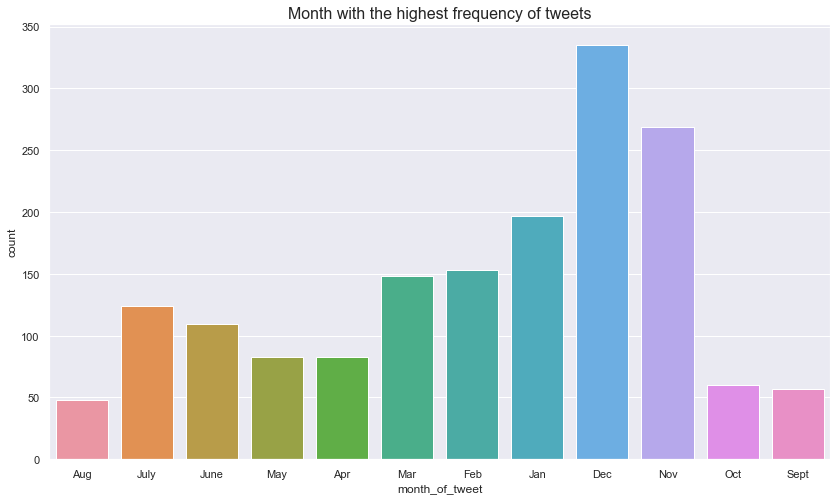

In [656]:
# Checking the month with the highest frequency of tweets
ax1 = sns.countplot(x='month_of_tweet', data=df)
plt.title("Month with the highest frequency of tweets", fontsize= 16);

In [657]:
df.name.value_counts()

a             46
Cooper        10
Lucy          10
Charlie       10
Tucker         9
              ..
Chevy          1
Philbert       1
Rupert         1
Brudge         1
Christoper     1
Name: name, Length: 850, dtype: int64

### Most Common day for tweeting

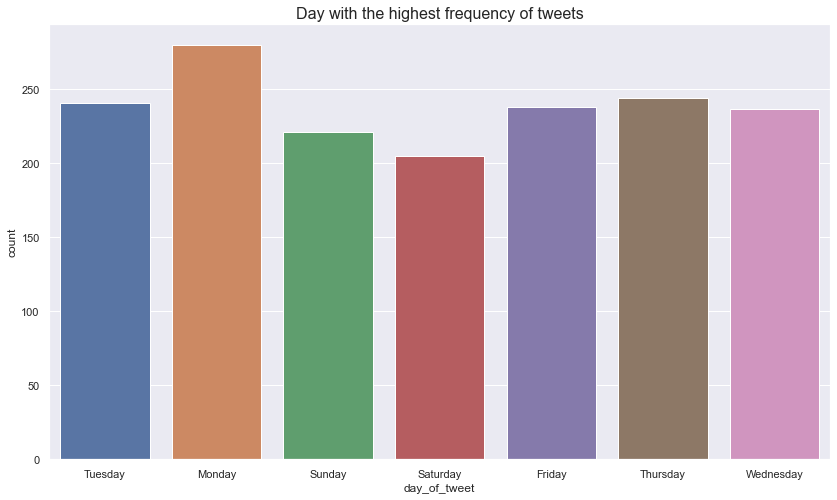

In [658]:
# Checking the month with the highest frequency of tweets
ax1 = sns.countplot(x='day_of_tweet', data=df)
plt.title("Day with the highest frequency of tweets", fontsize=16);

### Checking the distribution for the dog stage

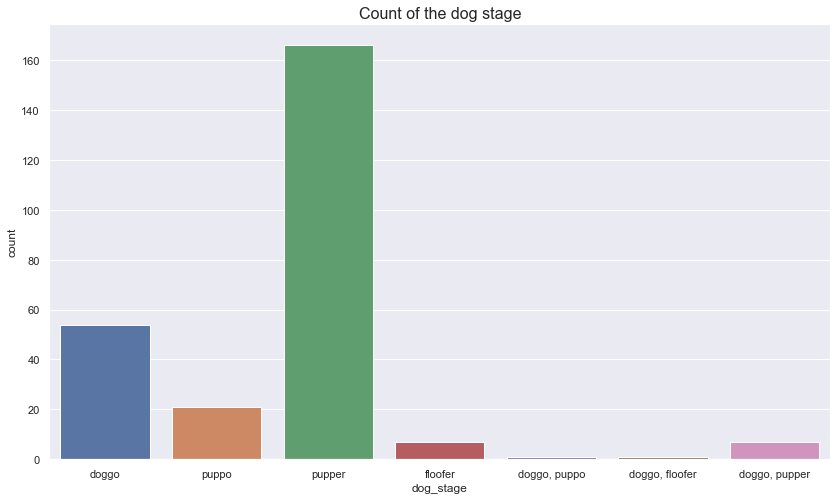

In [659]:
# Checking the most common dog stage
ax1 = sns.countplot(x='dog_stage', data=df)
plt.title("Count of the dog stage", fontsize=16);

### Checking the distribution for the tweet source

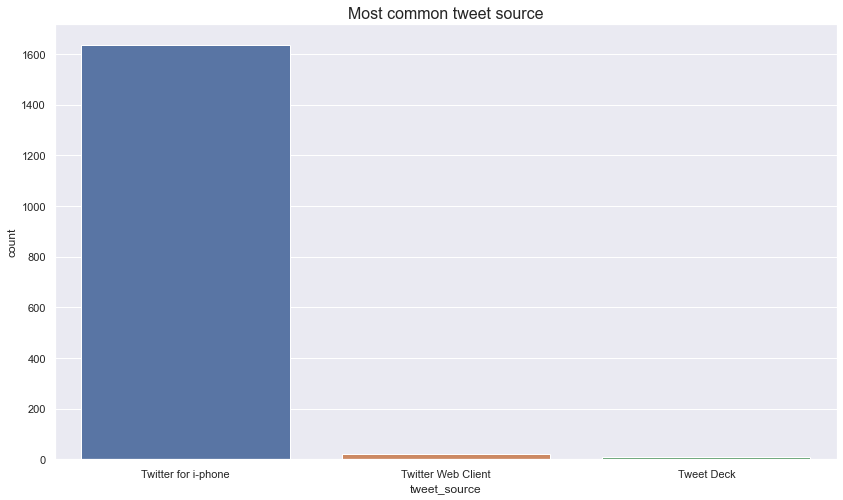

In [660]:
# Checking the month with the highest frequency of tweets
ax1 = sns.countplot(x='tweet_source', data=df)
plt.title("Most common tweet source", fontsize=16);

### Distribution for tweet years

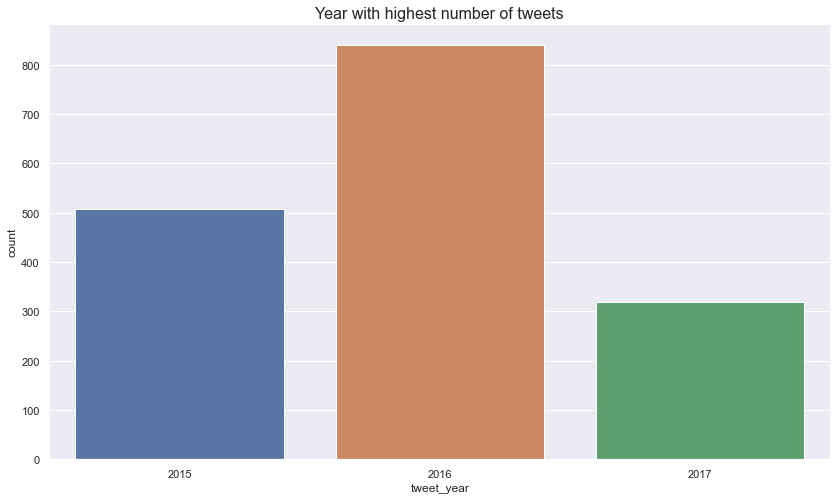

In [661]:
# Checking the month with the highest frequency of tweets
ax1 = sns.countplot(x='tweet_year', data=df)
plt.title("Year with highest number of tweets", fontsize=16);

### Distribution for dog breeds

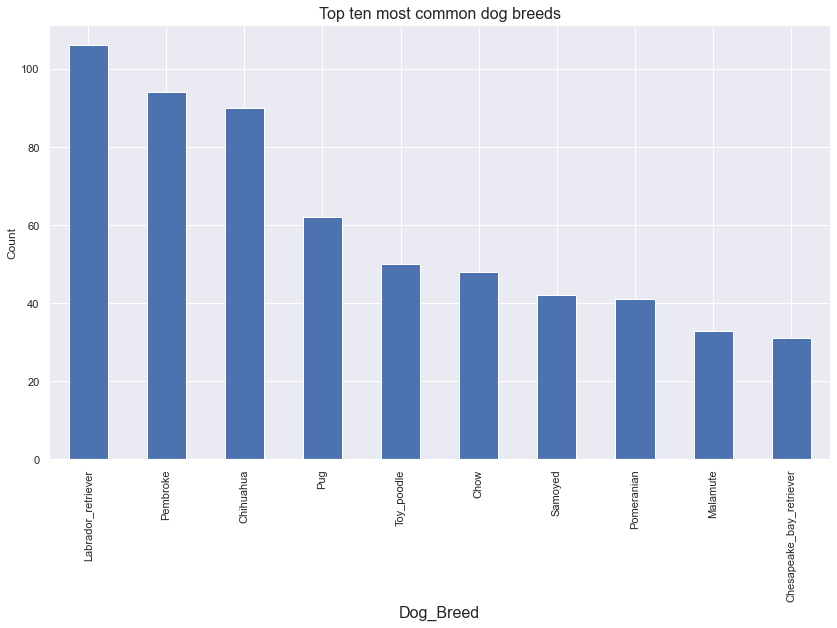

In [662]:
df.dog_breed.value_counts().head(11)[1:].plot(kind = 'bar')
plt.xlabel('Dog_Breed', fontsize=16)
plt.title('Top ten most common dog breeds', fontsize=16) 
plt.ylabel('Count');

In [663]:
df.head(1)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,tweet_year,month_of_tweet,day_of_tweet,hour_of_tweet,tweet_source,dog_stage,jpg_url,img_num,dog_breed,confidence_rating,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,2017,Aug,Tuesday,0,Twitter for i-phone,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,6514,33819


### Most Liked and retweeted dog breeds based on favourite and retweet counts

In [666]:
# Checking the dog breed preference based on likes
dog_breed_likes = df.groupby('dog_breed')['favorite_count'].sum().sort_values(ascending=False).head(6)
dog_breed_likes

dog_breed
Golden_retriever      1943782
Labrador_retriever    1265355
Pembroke              1038797
Chihuahua              743689
Samoyed                583906
French_bulldog         570921
Name: favorite_count, dtype: int64

In [669]:
# Checking The dog breed preference based on retweet count
dog_breed_retweet = df.groupby('dog_breed')['retweet_count'].sum().sort_values(ascending=False).head(6)
dog_breed_retweet

dog_breed
Golden_retriever      586657
Labrador_retriever    405404
Pembroke              291771
Chihuahua             250722
Samoyed               203446
French_bulldog        156230
Name: retweet_count, dtype: int64

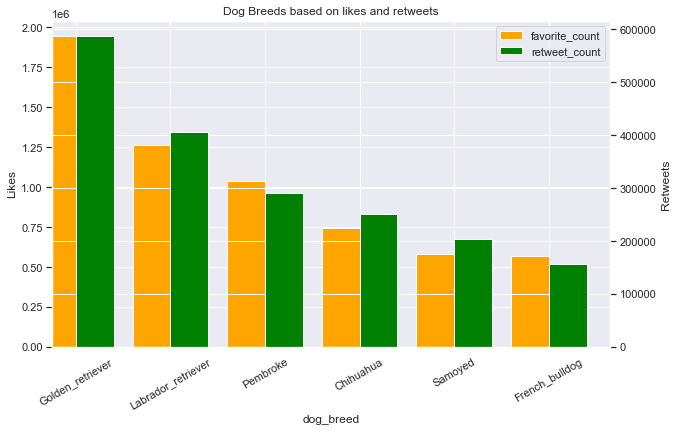

In [671]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()


dog_breed_likes.plot(figsize = (10,6), kind='bar', color='orange', ax=ax1, width=0.4, position=1, 
             title='Dog Breeds based on likes and retweets')
dog_breed_retweet.plot(figsize = (10,6), kind='bar', color='green', ax=ax2, width=0.4, position=0)

ax1.set_ylabel('Likes')
ax2.set_ylabel('Retweets')
ax1.set_xticklabels(dog_breed_likes.index, rotation=30)

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()

plt.legend(h1+h2, l1+l2, loc=1)
#save pic
plt.savefig('popular_dogs.png', dpi=100)

plt.show();